# Modelo de Probabilidad de Default (PD) con Regresión Logística & Random Forest

In [1]:
# Importemos Bibliotecas

In [2]:
# --- Importar Librerías Necesarias ---

# Manipulación de Datos
import numpy as np
import pandas as pd

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Métricas de Evaluación de Modelos
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    mean_squared_error,
    precision_score,
    recall_score,
    f1_score,
    log_loss
)

# Utilidades para Búsqueda de Hiperparámetros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Utilidades Varias (para la clase de p-values, si la mantienes)
import scipy.stats as stat
from sklearn import linear_model # Necesario para la clase RegresionLogistica_con_p_values

# Visualización de Datos
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para Pandas (opcional, pero útil para visualizar DataFrames grandes)
pd.options.display.max_rows = None

# Configuración de estilo para Seaborn (opcional, para mejorar la apariencia de los gráficos)
sns.set()

In [3]:
# Importemos los Datos


In [4]:
independientes_evaluacion = pd.read_csv('datos_guardados_independientes_evaluacion.csv', index_col = 0)


In [5]:
dependiente_evaluacion = pd.read_csv('datos_guardados_dependiente_evaluacion.csv', index_col = 0)


In [6]:
independientes_entreno = pd.read_csv('datos_guardados_independientes_entreno.csv', index_col = 0)


In [7]:
dependiente_entreno = pd.read_csv('datos_guardados_dependiente_entreno.csv', index_col = 0)

In [8]:
# Exploremos los datos

In [9]:
independientes_entreno.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti_19.9-20.8,dti_20.8-23.2,dti_23.2-35.2,dti>35.2,mths_since_last_record_faltantes,mths_since_last_record_0-3,mths_since_last_record_3-21,mths_since_last_record_21-31,mths_since_last_record_31-85,mths_since_last_record>85
344531,344531,21200994,23503865,10000,10000,10000.0,36 months,11.67,330.57,B,...,0,0,0,0,1,0,0,0,0,0
328300,328300,23904923,26277659,11000,11000,11000.0,36 months,12.49,367.94,B,...,0,0,0,0,1,0,0,0,0,0
299890,299890,28603222,31126369,10950,10950,10950.0,60 months,18.99,283.99,E,...,0,1,0,0,0,0,0,0,1,0
439226,439226,12325666,14317820,35000,35000,35000.0,36 months,15.31,1218.61,C,...,0,0,1,0,1,0,0,0,0,0
167889,167889,3294813,4066999,8000,8000,7975.0,36 months,12.12,266.18,B,...,0,0,0,0,1,0,0,0,0,0


In [10]:
dependiente_entreno.head()

,buenos_malos
344531,1
328300,1
299890,1
439226,1
167889,0


In [11]:
independientes_entreno.shape

(419656, 286)

In [12]:
dependiente_entreno.shape

(419656, 1)

In [13]:
independientes_evaluacion.shape

(46629, 286)

In [14]:
dependiente_evaluacion.shape

(46629, 1)

In [15]:
# Seleccionemos las variables independientes que utilizaremos en nuestro modelo
# Los df que importamos son bastante pesados y tienen varias columnas (variables)
# que no necesitamos para nuestro modelo
# Cuando construimos nuestro modelo, preferimos utilizar un df que incluya sólo las variables que realmente utilizaremos. Esto para ayudarle a la máquina.
# Utilizaremos la lista que generamos en excel (¡para esto servía!) y el método .loc

In [16]:
independientes_entreno_modelo = independientes_entreno.loc[:, ['Casa_MORTGAGE',
'Casa_RENT_ANY_OTHER_NONE',
'Casa_OWN',
'Direccion_ND_NE_IA_NV',
'Direccion_FL',
'Direccion_AL_HI_MO_NM',
'Direccion_CA',
'Direccion_NC_ID_NJ',
'Direccion_NY',
'Direccion_KY_LA_MD',
'Direccion_MI_AR_AZ_VA_OK_DE_OH',
'Direccion_MN_PA_UT_MA_RI_WA_TN_IN',
'Direccion_CT_IL',
'Direccion_TX',
'Direccion_NH_AK_MT_MS_WY_WV_DC_ME',
#'Verificacion_Not Verified',
'Verificacion_Source Verified',
'Verificacion_Verified',
'Proposito_ed_pyme_enerren_mudanza',
'Proposito_casa_otros_boda_salud_vacacion',
'Proposito_comprasgrandes_mejoras_carro',
'Proposito_debt_consolidation',
'Proposito_credit_card',
#'Grados_A',
'Grados_B',
'Grados_C',
'Grados_D',
'Grados_E',
'Grados_F_G',
#'Estado_Lista_f',
'Estado_Lista_w',
'plazo_36',
'plazo_60',
'antiguedad_menosde1',
'antiguedad_1a4',
'antiguedad_5a6',
'antiguedad_7',
'antiguedad_8a9',
'antiguedad_10+',
'meses_credito<87',
'meses_credito_87_89',
'meses_credito_89_90',
'meses_credito_90_98',
'meses_credito_98_101',
'meses_credito_101_110',
'meses_credito_110_126',
'meses_credito_126_155',
'meses_credito_155+',
'ingresos_anuales<20K',
'ingresos_anuales20K-30K',
'ingresos_anuales30K-40K',
'ingresos_anuales40K-50K',
'ingresos_anuales50K-60K',
'ingresos_anuales60K-70K',
'ingresos_anuales70K-80K',
'ingresos_anuales80K-90K',
'ingresos_anuales90K-100K',
'ingresos_anuales100K-126K',
'ingresos_anuales126K-152K',
'ingresos_anuales152K-227K',
'ingresos_anuales>227K',
'meses_desde_fallo_null',
'meses_desde_fallo_0-4',
'meses_desde_fallo_4-30',
'meses_desde_fallo_30-60',
'meses_desde_fallo_60-83',
'meses_desde_fallo_83+',
'morosidad_2anios_0',
'morosidad_2anios_1-4',
'morosidad_2anios_>=5',
'total_acc_<=6',
'total_acc_6-22',
'total_acc_22-50',
'total_acc_>50',
'dti<=3.2',
'dti_3.2-8.8',
'dti_8.8-10.4',
'dti_10.4-13.6',
'dti_13.6-16.0',
'dti_16.0-16.7',
'dti_16.7-19.9',
'dti_19.9-20.8',
'dti_20.8-23.2',
'dti_23.2-35.2',
'dti>35.2',
'mths_since_last_record_faltantes',
'mths_since_last_record_0-3',
'mths_since_last_record_3-21',
'mths_since_last_record_21-31',
'mths_since_last_record_31-85',
'mths_since_last_record>85']]

In [17]:
# Recordemos que cuando hacemos una regresión logística, no necesitamos incluir todas las variables
# dummies relacionada a cada variable categórica. Necesitamos (n-1) variables dummie de cada categoría, también guardamos en nuestra lista de excel las variables de referencia, es decir
# aquella variable con el menor Peso de la Evidencia.
# Generemos un df con las categorias de referencia

In [18]:
categorias_referencia = ['Casa_RENT_ANY_OTHER_NONE',
'Direccion_ND_NE_IA_NV',
'Verificacion_Verified',
'Proposito_ed_pyme_enerren_mudanza',
'Grados_F_G',
#'Estado_Lista_f',
'plazo_60',
'antiguedad_menosde1',
'meses_credito_155+',
'ingresos_anuales<20K',
'meses_desde_fallo_83+',
'morosidad_2anios_>=5',
'total_acc_<=6',
'dti_23.2-35.2',
'meses_credito_87_89',
'meses_credito_89_90',
'meses_credito_90_98',
'meses_credito_98_101',
'meses_credito_101_110',
'mths_since_last_record_0-3'
]

In [19]:
# Finalmente, generemos el df con el que haremos el fit del modelo es decir, quitemos la categoría
# de referencia para cada una de los conjuntos de variables dummies
# Esto es bien fácil con método .drop

In [20]:
independiente_entreno = independientes_entreno_modelo.drop(categorias_referencia, axis = 1)

In [21]:
independiente_entreno.head()

,Casa_MORTGAGE,Casa_OWN,Direccion_FL,Direccion_AL_HI_MO_NM,Direccion_CA,Direccion_NC_ID_NJ,Direccion_NY,Direccion_KY_LA_MD,Direccion_MI_AR_AZ_VA_OK_DE_OH,Direccion_MN_PA_UT_MA_RI_WA_TN_IN,...,dti_16.0-16.7,dti_16.7-19.9,dti_19.9-20.8,dti_20.8-23.2,dti>35.2,mths_since_last_record_faltantes,mths_since_last_record_3-21,mths_since_last_record_21-31,mths_since_last_record_31-85,mths_since_last_record>85
344531,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
328300,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
299890,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
439226,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
167889,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


# Estimación del Modelo de Probabilidad de Default

In [22]:
# Importemos modelo de Regresión Logística

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [24]:
# Creamos regresion una objeto de la clase LogisticRegression

In [25]:
#Primero se probo sin balancear, posterior con un C=1 y por ultimo con un C=10
regresion = LogisticRegression(solver = 'newton-cg',C=10 ,class_weight='balanced')

In [26]:
# Como tenemos un montón de variables, queremos estar seguros que todos se van a imprimir
# Definamos que no haya un número máximo de líneas en el display:

In [27]:
pd.options.display.max_rows = None

In [28]:
# Estimamos el modelo aplicando el método fit al objeto regresion con las variables
# independientes y dependiente como parámetros
# fit estima el modelo y guarda los resultados en el objeto regresion

In [29]:
regresion.fit(independiente_entreno, dependiente_entreno)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10, class_weight='balanced', solver='newton-cg')

In [30]:
# Para obtener el intercepto de la regresión, utilizamos el método .intercept_

In [31]:
regresion.intercept_

array([-2.53538181])

In [32]:
# El método .coef_ nos da los coeficientes en el orden del df de variables independientes

In [33]:
regresion.coef_

array([[ 0.16032869,  0.12855052, -0.2149665 , -0.16112624, -0.14532878,
        -0.153157  , -0.12736172, -0.12231155, -0.08027606, -0.07211617,
         0.03520926,  0.04611398,  0.30088007,  0.10602341,  0.45736407,
         0.66867801,  0.59825461,  0.79055107, -0.05291768, -0.4141298 ,
        -0.6837027 , -0.90338536,  0.25831983,  0.34558955,  0.06233737,
         0.01080583,  0.01177815,  0.01268272,  0.10653856,  0.96588607,
        -0.584772  , -0.40903657, -0.09288295, -0.02633917,  0.05825069,
         0.16400084,  0.19638982,  0.29922065,  0.36262679,  0.42813259,
         0.49387008,  0.56925775,  0.55428949,  0.54824735,  0.34624108,
         0.26754012,  0.35044942,  0.37912401,  0.33412654,  0.11632269,
         0.09979093,  0.08136513,  0.07650311,  0.06300547,  0.40268639,
         0.38696073,  0.29754926,  0.25316292,  0.22735301,  0.16988356,
         0.13011486,  0.11171261,  0.0516177 ,  0.22419101,  1.01653023,
         1.19501863,  1.18704301,  1.25505113,  0.8

In [34]:
# Una vez tenemos el modelo, debemos darle un formato estándar al que obtendríamos con un software de econometría omo SPSS o similares
# Creamos un array con los nombres de las variables independientes

In [35]:
nombres_var_independientes = independiente_entreno.columns.values
nombres_var_independientes

array(['Casa_MORTGAGE', 'Casa_OWN', 'Direccion_FL',
       'Direccion_AL_HI_MO_NM', 'Direccion_CA', 'Direccion_NC_ID_NJ',
       'Direccion_NY', 'Direccion_KY_LA_MD',
       'Direccion_MI_AR_AZ_VA_OK_DE_OH',
       'Direccion_MN_PA_UT_MA_RI_WA_TN_IN', 'Direccion_CT_IL',
       'Direccion_TX', 'Direccion_NH_AK_MT_MS_WY_WV_DC_ME',
       'Verificacion_Source Verified',
       'Proposito_casa_otros_boda_salud_vacacion',
       'Proposito_comprasgrandes_mejoras_carro',
       'Proposito_debt_consolidation', 'Proposito_credit_card',
       'Grados_B', 'Grados_C', 'Grados_D', 'Grados_E', 'Estado_Lista_w',
       'plazo_36', 'antiguedad_1a4', 'antiguedad_5a6', 'antiguedad_7',
       'antiguedad_8a9', 'antiguedad_10+', 'meses_credito<87',
       'meses_credito_110_126', 'meses_credito_126_155',
       'ingresos_anuales20K-30K', 'ingresos_anuales30K-40K',
       'ingresos_anuales40K-50K', 'ingresos_anuales50K-60K',
       'ingresos_anuales60K-70K', 'ingresos_anuales70K-80K',
       'ingresos_an

In [36]:
# Ahora creamos una tabla resumen con los resultados de nuestra regresión logística
# Para empezar, creamos una columna con los nombres de las variables independientes

In [37]:
tabla_resultados = pd.DataFrame(columns = ['Variable Independiente'], data = nombres_var_independientes)

In [38]:
# Luego, creamos una segunda columna con los coeficientes para cada variable independiente
# Utilizamos el método .transpose para transponer (de forma vertical) los coeficientes

In [39]:
tabla_resultados ['Coeficientes'] = np.transpose(regresion.coef_)

In [40]:
# el intercepto en la primera fila de nuestra tabla
# En primer lugar, añadimos una línea en blanco a nuestra tabla que esté por encima de todas las demás
#Utilizando el método .index añadimo 1 al índice de cada fila. Así 0 se vuelve 1, 1 -> 2...

In [41]:
tabla_resultados.index = tabla_resultados.index + 1
tabla_resultados

,Variable Independiente,Coeficientes
1,Casa_MORTGAGE,0.160329
2,Casa_OWN,0.128551
3,Direccion_FL,-0.214967
4,Direccion_AL_HI_MO_NM,-0.161126
5,Direccion_CA,-0.145329
6,Direccion_NC_ID_NJ,-0.153157
7,Direccion_NY,-0.127362
8,Direccion_KY_LA_MD,-0.122312
9,Direccion_MI_AR_AZ_VA_OK_DE_OH,-0.080276
10,Direccion_MN_PA_UT_MA_RI_WA_TN_IN,-0.072116


In [42]:
# Ahora llenamos la línea 1 con el nombre de intercepto y su valor respectivo

In [43]:
tabla_resultados.loc[0] = ['Intercepto', regresion.intercept_[0]]
tabla_resultados

,Variable Independiente,Coeficientes
1,Casa_MORTGAGE,0.160329
2,Casa_OWN,0.128551
3,Direccion_FL,-0.214967
4,Direccion_AL_HI_MO_NM,-0.161126
5,Direccion_CA,-0.145329
6,Direccion_NC_ID_NJ,-0.153157
7,Direccion_NY,-0.127362
8,Direccion_KY_LA_MD,-0.122312
9,Direccion_MI_AR_AZ_VA_OK_DE_OH,-0.080276
10,Direccion_MN_PA_UT_MA_RI_WA_TN_IN,-0.072116


In [44]:
# Ordenemos la tabla por el número de índice usando el método .sort

In [45]:
tabla_resultados = tabla_resultados.sort_index()
tabla_resultados

,Variable Independiente,Coeficientes
0,Intercepto,-2.535382
1,Casa_MORTGAGE,0.160329
2,Casa_OWN,0.128551
3,Direccion_FL,-0.214967
4,Direccion_AL_HI_MO_NM,-0.161126
5,Direccion_CA,-0.145329
6,Direccion_NC_ID_NJ,-0.153157
7,Direccion_NY,-0.127362
8,Direccion_KY_LA_MD,-0.122312
9,Direccion_MI_AR_AZ_VA_OK_DE_OH,-0.080276


# Estimando p-values para la Regresión Logística

In [46]:
# Los p-values nos sirven para determinar cuáles de las variables independientes son estadísticamente significativas para explicar la variación de la variable dependiente
# Lamentablemente, una limitante de las Regresiones Logísticas en Python, es que no estima los
# p_values multivariable de forma directa. Sin embargo, luego de hacer una búsqueda
# podemos encontrar el código de alguien que ya resolvió este problema:
# https://gist.github.com/rspeare/77061e6e317896be29c6de9a85db301d
# Aquí tenemos el código para una nueva clase que llamaremos RegresionLogistica_con_p_values
# Si quieren más info de los parámetros de la función Regresión Logística.
# Documentacion: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [47]:
from sklearn import linear_model
import numpy as np
import scipy.stats as stat

class RegresionLogistica_con_p_values:
    """
    Wrapper Class for Logistic Regression which has the usual sklearn instance 
    in an attribute self.model, and pvalues, z scores and estimated 
    errors for each coefficient in 
    
    self.z_scores
    self.p_values
    self.sigma_estimates
    
    as well as the negative hessian of the log Likelihood (Fisher information)
    
    self.F_ij
    """
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs,solver = 'newton-cg',C=10,class_weight='balanced')#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        #### Get p-values for the fitted model ####
        denom = (2.0*(1.0+np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X/denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0]/sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x))*2 for x in z_scores] ### two tailed test for p-values
        
        self.z_scores = z_scores
        self.p_values = p_values
        self.sigma_estimates = sigma_estimates
        self.F_ij = F_ij

In [48]:
# Vamos a crear un objeto de clase RegresionLogistica_con_p_values

In [49]:
reglogistica_p_values = RegresionLogistica_con_p_values()

In [50]:
# Un requisito de la función que hemos definido es que la variable dependiente sea un array
# en lugar de un dataframe, esto no es ningún problema y parano obtener un error, utilizamos .ravel()

In [51]:
# aplicar a 'independiente_entreno'

print("--- Verificando columnas con varianza cero en independiente_entreno ---")
constant_columns = []
for col in independiente_entreno.columns:
    if independiente_entreno[col].nunique() == 1:
        constant_columns.append(col)
        print(f"La columna '{col}' es constante. Su valor es: {independiente_entreno[col].iloc[0]}")

if constant_columns:
    print("\n¡ATENCIÓN! Las siguientes columnas son constantes y deben ser eliminadas:")
    print(constant_columns)

    print("\nDespués de eliminar las columnas constantes, intenta ejecutar tu modelo de nuevo.")
else:
    print("No se encontraron columnas constantes en independiente_entreno.")

--- Verificando columnas con varianza cero en independiente_entreno ---
No se encontraron columnas constantes en independiente_entreno.


In [52]:
reglogistica_p_values.fit(independiente_entreno, dependiente_entreno.values.ravel())

In [53]:
# Pueden obtener dos mensajes de advertencia. El primero, y más crítico, es
# "LinAlgError: Singular matrix" 
# Este error implica que al menos dos de sus variables están perfectamente correlacionadas
# Puede ser que hayan duplicado los valores de una variable en otra
# Pero lo más probables, es que cuando definimos la variable con np.where(condicion, 1, 0)
# lo hicimos mal, y todos los datos de la columna son 0 porque nunca se cumplio la condición
# Este es un error bien común y por eso se los comento, de hecho es lo que me paso a mi, 
# Como pueden ver que columnas tienen problemas: estimando el coeficiente de correlación
# Si dos variables tienen un valor de 1 (fuera de la diagonal principal) o NaN, entonces
# van a obtener el error de Singular matrix.

In [54]:
independiente_entreno.corr()

,Casa_MORTGAGE,Casa_OWN,Direccion_FL,Direccion_AL_HI_MO_NM,Direccion_CA,Direccion_NC_ID_NJ,Direccion_NY,Direccion_KY_LA_MD,Direccion_MI_AR_AZ_VA_OK_DE_OH,Direccion_MN_PA_UT_MA_RI_WA_TN_IN,...,dti_16.0-16.7,dti_16.7-19.9,dti_19.9-20.8,dti_20.8-23.2,dti>35.2,mths_since_last_record_faltantes,mths_since_last_record_3-21,mths_since_last_record_21-31,mths_since_last_record_31-85,mths_since_last_record>85
Casa_MORTGAGE,1.000000,-0.316638,-0.008751,0.037809,-0.137074,0.000585,-0.119382,0.028450,0.064833,0.040091,...,0.006780,0.014412,0.004283,-0.001197,-0.013931,0.003207,0.005091,-0.000796,-0.014011,0.012344
Casa_OWN,-0.316638,1.000000,0.013075,0.011641,-0.041781,0.003938,0.012143,0.012426,0.004977,-0.008133,...,-0.006030,-0.006422,0.000150,0.002826,0.018359,-0.003668,0.004111,0.002372,0.003332,-0.000241
Direccion_FL,-0.008751,0.013075,1.000000,-0.054846,-0.114913,-0.071681,-0.083039,-0.058295,-0.104386,-0.107951,...,0.000142,0.001612,0.002341,0.002744,0.001770,0.009441,-0.007535,-0.009379,-0.002361,-0.007732
Direccion_AL_HI_MO_NM,0.037809,0.011641,-0.054846,1.000000,-0.086432,-0.053915,-0.062458,-0.043847,-0.078514,-0.081196,...,-0.000812,0.003016,0.003349,0.008487,0.008183,-0.004468,-0.003477,-0.000967,-0.000975,0.008619
Direccion_CA,-0.137074,-0.041781,-0.114913,-0.086432,1.000000,-0.112962,-0.130862,-0.091868,-0.164503,-0.170121,...,-0.001196,-0.008250,-0.009245,-0.016621,-0.012144,0.016581,-0.005972,-0.002496,0.002819,-0.023724
Direccion_NC_ID_NJ,0.000585,0.003938,-0.071681,-0.053915,-0.112962,1.000000,-0.081629,-0.057306,-0.102614,-0.106119,...,0.001381,-0.001348,-0.003882,-0.005188,-0.000167,0.010196,-0.001657,-0.002895,-0.003844,-0.011050
Direccion_NY,-0.119382,0.012143,-0.083039,-0.062458,-0.130862,-0.081629,1.000000,-0.066386,-0.118874,-0.122934,...,-0.000688,-0.014714,-0.003690,-0.014369,-0.004947,0.007928,0.018177,0.010492,-0.007893,-0.012931
Direccion_KY_LA_MD,0.028450,0.012426,-0.058295,-0.043847,-0.091868,-0.057306,-0.066386,1.000000,-0.083452,-0.086303,...,0.002335,0.001587,0.002693,0.002682,-0.000538,0.003040,-0.000286,0.003649,-0.001995,-0.003477
Direccion_MI_AR_AZ_VA_OK_DE_OH,0.064833,0.004977,-0.104386,-0.078514,-0.164503,-0.102614,-0.118874,-0.083452,1.000000,-0.154537,...,-0.003645,0.004438,0.005317,0.012344,0.003497,-0.032746,0.006908,0.007264,0.018053,0.025881
Direccion_MN_PA_UT_MA_RI_WA_TN_IN,0.040091,-0.008133,-0.107951,-0.081196,-0.170121,-0.106119,-0.122934,-0.086303,-0.154537,1.000000,...,0.000482,0.005669,0.001547,0.003393,0.000012,-0.012247,-0.002570,0.000771,0.004591,0.013886


In [55]:
# El segundo tipo de mensaje de advertencia que podrían obtener es el "ConvergenceWarning," es 
# decir que el modelo no Converge. En ese caso, podrían probar aumentar el número de iteraciones
# o probar con diferentes solvers como “lbfgs”, “newton-cg” o “sag.” 
# Documentacion: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [56]:
# Una vez que hemos generado la regresión logística podemos agregar los p_values a nuestra tabla de 
# resultados
# Veamos los p_values

In [57]:
p_values = reglogistica_p_values.p_values
p_values

[2.0474323501753954e-99,
 4.244420794065647e-26,
 6.718383113908996e-43,
 1.1043159464564455e-17,
 7.140205790878229e-30,
 4.268266783938968e-22,
 5.645486645663169e-18,
 1.3252597426598727e-11,
 8.470319697150386e-10,
 2.3278615665912633e-08,
 0.036603202194936096,
 0.002245105206257714,
 3.1485506881666703e-37,
 1.9967770590200437e-50,
 2.09191720533672e-75,
 1.7727635793222704e-162,
 3.1186825585972006e-154,
 2.011793135900418e-251,
 5.455511788905664e-08,
 0.0,
 0.0,
 0.0,
 6.755895148413045e-274,
 0.0,
 1.0816846255092899e-11,
 0.44199186990096406,
 0.4330815055812146,
 0.4300120666062591,
 3.787332537881961e-35,
 0.0,
 0.0,
 1.7001940528053748e-180,
 0.0004071173265823527,
 0.2692238832263426,
 0.01263508183189977,
 2.7837977424105305e-12,
 1.1054679880024939e-16,
 4.08895559560373e-35,
 3.5867110835311845e-48,
 7.202202261561554e-62,
 5.172197795307799e-90,
 2.377349131876951e-92,
 1.923645833406584e-79,
 4.641432193005654e-46,
 3.789699615317003e-06,
 0.0003100746724589738,
 1.

In [58]:
# El intercepto no tiene un p_value, pero necesitamos un dato NaN para tener una columna de 
# dimensión consistente. Utilizamos el método append

In [59]:
p_values = np.append(np.nan, np.array(p_values))

In [60]:
p_values

array([            nan, 2.04743235e-099, 4.24442079e-026, 6.71838311e-043,
       1.10431595e-017, 7.14020579e-030, 4.26826678e-022, 5.64548665e-018,
       1.32525974e-011, 8.47031970e-010, 2.32786157e-008, 3.66032022e-002,
       2.24510521e-003, 3.14855069e-037, 1.99677706e-050, 2.09191721e-075,
       1.77276358e-162, 3.11868256e-154, 2.01179314e-251, 5.45551179e-008,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 6.75589515e-274,
       0.00000000e+000, 1.08168463e-011, 4.41991870e-001, 4.33081506e-001,
       4.30012067e-001, 3.78733254e-035, 0.00000000e+000, 0.00000000e+000,
       1.70019405e-180, 4.07117327e-004, 2.69223883e-001, 1.26350818e-002,
       2.78379774e-012, 1.10546799e-016, 4.08895560e-035, 3.58671108e-048,
       7.20220226e-062, 5.17219780e-090, 2.37734913e-092, 1.92364583e-079,
       4.64143219e-046, 3.78969962e-006, 3.10074672e-004, 1.83302369e-006,
       4.87763878e-007, 1.05403837e-005, 6.43954958e-003, 1.62893372e-002,
       1.59017323e-003, 3

In [61]:
tabla_resultados

,Variable Independiente,Coeficientes
0,Intercepto,-2.535382
1,Casa_MORTGAGE,0.160329
2,Casa_OWN,0.128551
3,Direccion_FL,-0.214967
4,Direccion_AL_HI_MO_NM,-0.161126
5,Direccion_CA,-0.145329
6,Direccion_NC_ID_NJ,-0.153157
7,Direccion_NY,-0.127362
8,Direccion_KY_LA_MD,-0.122312
9,Direccion_MI_AR_AZ_VA_OK_DE_OH,-0.080276


In [62]:
# Agreguemos una tercera columna

In [63]:
tabla_resultados['p_values'] = p_values

In [64]:
tabla_resultados

,Variable Independiente,Coeficientes,p_values
0,Intercepto,-2.535382,NaN
1,Casa_MORTGAGE,0.160329,2.047432e-99
2,Casa_OWN,0.128551,4.244421e-26
3,Direccion_FL,-0.214967,6.718383e-43
4,Direccion_AL_HI_MO_NM,-0.161126,1.104316e-17
5,Direccion_CA,-0.145329,7.140206e-30
6,Direccion_NC_ID_NJ,-0.153157,4.268267e-22
7,Direccion_NY,-0.127362,5.645487e-18
8,Direccion_KY_LA_MD,-0.122312,1.325260e-11
9,Direccion_MI_AR_AZ_VA_OK_DE_OH,-0.080276,8.470320e-10


# Seleccionando Variable con p-values

In [65]:
# Seleccion de las variables dummies relacionadas a la variable incidencias de morosidad
# durante los últimos 2 años, ya que no estadísticamente significativa de acuerdo a su p-value
# morosidad_2anios_0
# morosidad_2anios_1-4

In [66]:
# Remuevo las variables dummies relacionadas a morosidad_2anios del df de variables independientesoriginal

In [67]:
independientes_entreno_modelo = independientes_entreno.loc[:, ['Casa_MORTGAGE',
'Casa_RENT_ANY_OTHER_NONE',
'Casa_OWN',
'Direccion_ND_NE_IA_NV',
'Direccion_FL',
'Direccion_AL_HI_MO_NM',
'Direccion_CA',
'Direccion_NC_ID_NJ',
'Direccion_NY',
'Direccion_KY_LA_MD',
'Direccion_MI_AR_AZ_VA_OK_DE_OH',
'Direccion_MN_PA_UT_MA_RI_WA_TN_IN',
'Direccion_CT_IL',
'Direccion_TX',
'Direccion_NH_AK_MT_MS_WY_WV_DC_ME',
#'Verificacion_Not Verified',
'Verificacion_Source Verified',
'Verificacion_Verified',
'Proposito_ed_pyme_enerren_mudanza',
'Proposito_casa_otros_boda_salud_vacacion',
'Proposito_comprasgrandes_mejoras_carro',
'Proposito_debt_consolidation',
'Proposito_credit_card',
#'Grados_A',
'Grados_B',
'Grados_C',
'Grados_D',
'Grados_E',
'Grados_F_G',
#'Estado_Lista_f',
'Estado_Lista_w',
'plazo_36',
'plazo_60',
'antiguedad_menosde1',
'antiguedad_1a4',
'antiguedad_5a6',
'antiguedad_7',
'antiguedad_8a9',
'antiguedad_10+',
'meses_credito<87',
'meses_credito_87_89',
'meses_credito_89_90',
'meses_credito_90_98',
'meses_credito_98_101',
'meses_credito_101_110',
'meses_credito_110_126',
'meses_credito_126_155',
'meses_credito_155+',
'ingresos_anuales<20K',
'ingresos_anuales20K-30K',
'ingresos_anuales30K-40K',
'ingresos_anuales40K-50K',
'ingresos_anuales50K-60K',
'ingresos_anuales60K-70K',
'ingresos_anuales70K-80K',
'ingresos_anuales80K-90K',
'ingresos_anuales90K-100K',
'ingresos_anuales100K-126K',
'ingresos_anuales126K-152K',
'ingresos_anuales152K-227K',
'ingresos_anuales>227K',
'meses_desde_fallo_null',
'meses_desde_fallo_0-4',
'meses_desde_fallo_4-30',
'meses_desde_fallo_30-60',
'meses_desde_fallo_60-83',
'meses_desde_fallo_83+',
#'morosidad_2anios_0',
#'morosidad_2anios_1-4',
#'morosidad_2anios_>=5',
'total_acc_<=6',
'total_acc_6-22',
'total_acc_22-50',
'total_acc_>50',
'dti<=3.2',
'dti_3.2-8.8',
'dti_8.8-10.4',
'dti_10.4-13.6',
'dti_13.6-16.0',
'dti_16.0-16.7',
'dti_16.7-19.9',
'dti_19.9-20.8',
'dti_20.8-23.2',
'dti_23.2-35.2',
'dti>35.2',
'mths_since_last_record_faltantes',
'mths_since_last_record_0-3',
'mths_since_last_record_3-21',
'mths_since_last_record_21-31',
'mths_since_last_record_31-85',
'mths_since_last_record>85']]

In [68]:
# Hago lo mismo con las categorías de referencia

In [69]:
categorias_referencia = ['Casa_RENT_ANY_OTHER_NONE',
'Direccion_ND_NE_IA_NV',
'Verificacion_Verified',
'Proposito_ed_pyme_enerren_mudanza',
'Grados_F_G',
#'Estado_Lista_f',
'plazo_60',
'antiguedad_menosde1',
'meses_credito_155+',
'ingresos_anuales<20K',
'meses_desde_fallo_83+',
# 'morosidad_2anios_>=5',
'total_acc_<=6',
'dti_23.2-35.2',
'meses_credito_87_89',
'meses_credito_89_90',
'meses_credito_90_98',
'meses_credito_98_101',
'meses_credito_101_110',
'mths_since_last_record_0-3']

In [70]:
# Reutilizo el código para quitar las variables de referencia de las variables independientes 
# del modelo

In [71]:
independiente_entreno = independientes_entreno_modelo.drop(categorias_referencia, axis = 1)

In [72]:
independiente_entreno.shape

(419656, 67)

In [73]:
# Definamos los objetos regresion2 y regresion2_p_values

In [74]:
regresion2 = regresion = LogisticRegression(solver = 'newton-cg',class_weight='balanced')
regresion2_p_values = RegresionLogistica_con_p_values()

In [75]:
# Hacemos el fit del modelo

In [76]:
regresion2.fit(independiente_entreno, dependiente_entreno.values.ravel())
regresion2_p_values.fit(independiente_entreno, dependiente_entreno.values.ravel())

In [77]:
# Reciclamos el código para hacer la tabla

In [78]:
nombres_var_independientes = independiente_entreno.columns.values
tabla_resultados = pd.DataFrame(columns = ['Variable Independiente'], data = nombres_var_independientes)
tabla_resultados['Coeficientes'] = np.transpose(regresion2.coef_)
tabla_resultados.index = tabla_resultados.index + 1
tabla_resultados.loc[0] = ['Intercepto', regresion2.intercept_[0]]
tabla_resultados = tabla_resultados.sort_index()
p_values = regresion2_p_values.p_values
p_values = np.append(np.nan, np.array(p_values))
tabla_resultados['p_values'] = p_values

In [79]:
tabla_resultados

,Variable Independiente,Coeficientes,p_values
0,Intercepto,-2.371890,NaN
1,Casa_MORTGAGE,0.160306,2.441306e-99
2,Casa_OWN,0.128580,4.097846e-26
3,Direccion_FL,-0.214868,6.726668e-43
4,Direccion_AL_HI_MO_NM,-0.160931,1.150605e-17
5,Direccion_CA,-0.145159,7.262887e-30
6,Direccion_NC_ID_NJ,-0.152972,4.453692e-22
7,Direccion_NY,-0.127269,5.419723e-18
8,Direccion_KY_LA_MD,-0.122236,1.294936e-11
9,Direccion_MI_AR_AZ_VA_OK_DE_OH,-0.080148,8.521851e-10


# Validación del Modelo PD

In [80]:
# la base de evaluación (testing), partimos la base original para guardar unos datos y poder evaluar que tan bueno es nuestro modelo

In [81]:
# Comencemos seleccionando las variables de nuestro modelo (deben ser las mismas de la base de entrenamiento)

In [82]:
independientes_evaluacion_modelo = independientes_evaluacion.loc[:, ['Casa_MORTGAGE',
'Casa_RENT_ANY_OTHER_NONE',
'Casa_OWN',
'Direccion_ND_NE_IA_NV',
'Direccion_FL',
'Direccion_AL_HI_MO_NM',
'Direccion_CA',
'Direccion_NC_ID_NJ',
'Direccion_NY',
'Direccion_KY_LA_MD',
'Direccion_MI_AR_AZ_VA_OK_DE_OH',
'Direccion_MN_PA_UT_MA_RI_WA_TN_IN',
'Direccion_CT_IL',
'Direccion_TX',
'Direccion_NH_AK_MT_MS_WY_WV_DC_ME',
#'Verificacion_Not Verified',
'Verificacion_Source Verified',
'Verificacion_Verified',
'Proposito_ed_pyme_enerren_mudanza',
'Proposito_casa_otros_boda_salud_vacacion',
'Proposito_comprasgrandes_mejoras_carro',
'Proposito_debt_consolidation',
'Proposito_credit_card',
#'Grados_A',
'Grados_B',
'Grados_C',
'Grados_D',
'Grados_E',
'Grados_F_G',
#'Estado_Lista_f',
'Estado_Lista_w',
'plazo_36',
'plazo_60',
'antiguedad_menosde1',
'antiguedad_1a4',
'antiguedad_5a6',
'antiguedad_7',
'antiguedad_8a9',
'antiguedad_10+',
'meses_credito<87',
'meses_credito_87_89',
'meses_credito_89_90',
'meses_credito_90_98',
'meses_credito_98_101',
'meses_credito_101_110',
'meses_credito_110_126',
'meses_credito_126_155',
'meses_credito_155+',
'ingresos_anuales<20K',
'ingresos_anuales20K-30K',
'ingresos_anuales30K-40K',
'ingresos_anuales40K-50K',
'ingresos_anuales50K-60K',
'ingresos_anuales60K-70K',
'ingresos_anuales70K-80K',
'ingresos_anuales80K-90K',
'ingresos_anuales90K-100K',
'ingresos_anuales100K-126K',
'ingresos_anuales126K-152K',
'ingresos_anuales152K-227K',
'ingresos_anuales>227K',
'meses_desde_fallo_null',
'meses_desde_fallo_0-4',
'meses_desde_fallo_4-30',
'meses_desde_fallo_30-60',
'meses_desde_fallo_60-83',
'meses_desde_fallo_83+',
#'morosidad_2anios_0',
#'morosidad_2anios_1-4',
#'morosidad_2anios_>=5',
'total_acc_<=6',
'total_acc_6-22',
'total_acc_22-50',
'total_acc_>50',
'dti<=3.2',
'dti_3.2-8.8',
'dti_8.8-10.4',
'dti_10.4-13.6',
'dti_13.6-16.0',
'dti_16.0-16.7',
'dti_16.7-19.9',
'dti_19.9-20.8',
'dti_20.8-23.2',
'dti_23.2-35.2',
'dti>35.2',
'mths_since_last_record_faltantes',
'mths_since_last_record_0-3',
'mths_since_last_record_3-21',
'mths_since_last_record_21-31',
'mths_since_last_record_31-85',
'mths_since_last_record>85']]

In [83]:
categorias_referencia = ['Casa_RENT_ANY_OTHER_NONE',
'Direccion_ND_NE_IA_NV',
'Verificacion_Verified',
'Proposito_ed_pyme_enerren_mudanza',
'Grados_F_G',
#'Estado_Lista_f',
'plazo_60',
'antiguedad_menosde1',
'meses_credito_155+',
'ingresos_anuales<20K',
'meses_desde_fallo_83+',
# 'morosidad_2anios_>=5',
'total_acc_<=6',
'dti_23.2-35.2',
'meses_credito_87_89',
'meses_credito_89_90',
'meses_credito_90_98',
'meses_credito_98_101',
'meses_credito_101_110',
'mths_since_last_record_0-3']

In [84]:
# Quitamos las variable de referencia de la base de dummies de evaluación

In [85]:
independiente_evaluacion = independientes_evaluacion_modelo.drop(categorias_referencia, axis = 1)

In [86]:
independiente_evaluacion.shape

(46629, 67)

In [87]:
independiente_entreno.shape

(419656, 67)

In [88]:
# Una vez que tenemos una base de evalución con las mismas 74 variables dummies de la
# base de entreno, estamos listos para aplicar el Modelo PD que ya tenemos en la base
# de evaluación


In [89]:
prediccion_y = regresion2.predict(independiente_evaluacion)

In [90]:
# Como funciona el modelo:
# 1. Me multiplican los valores de las variables dummies (1-0) por su respectivo coeficiente (Beta)
# El resultado es el logartimo de las probabilidades (odds) de ser un buen cliente (no caer en default)
# 2. Se estima la exponencial (e) del resultado anterior para obtener la probabilidad de ser un buen cliente
# 3. Finalmente, se determina un punto de corte para categorizar las probabilidades de ser bueno o malo
# El punto de corte por default es 0.8. Pero si se conocen los costos de ser bueno o malo, se puede
# determinar el punto de corte que optimice la función de utilidad.

In [91]:
prediccion_y

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [92]:
# Las predicciones anteriores fueron categorizadas con un punto de corte de 0.5
# Si nosotros deseamos hacer esta categorización, necesitamos las probabilidades

In [93]:
probabilidad_y = regresion2.predict_proba(independiente_evaluacion)

In [94]:
probabilidad_y

array([[0.43094595, 0.56905405],
       [0.31437392, 0.68562608],
       [0.39586938, 0.60413062],
       ...,
       [0.3752077 , 0.6247923 ],
       [0.62150114, 0.37849886],
       [0.42262632, 0.57737368]])

In [95]:
# Obtuvimos un array de arrays. Para cada una de las 46,629 observarciones tenemos dos valores
# La probabilidad de ser un mal cliente (PD) y la probabilidad de ser un buen cliente (1-PD)
# Generemos un array con la probabilidad de ser buen cliente

In [96]:
probabilidad_bueno = probabilidad_y[:,1]

In [97]:
probabilidad_bueno

array([0.56905405, 0.68562608, 0.60413062, ..., 0.6247923 , 0.37849886,
       0.57737368])

In [98]:
# Ahora generemos un df con dos columnas:
# 1. Con los valores reales de bueno-malo de la base evaluación
# 2. Con las probabilidades que acabamos de estimar
# No podemos simplemente concatenar un df con un array con diferentes índices.
# Debemos extraer primero los valores reales y quitar los índices

In [99]:
valores_reales = dependiente_evaluacion

In [100]:
valores_reales.head()

,buenos_malos
89223,1
158835,0
108909,1
270155,1
23971,1


In [101]:
valores_reales.reset_index(drop = True, inplace = True)

In [102]:
valores_reales.head()

,buenos_malos
0,1
1,0
2,1
3,1
4,1


In [103]:
# Ahora sí concatenemos

In [104]:
df_prediccion = pd.concat([valores_reales, pd.DataFrame(probabilidad_bueno)], axis = 1)

In [105]:
df_prediccion.head()

,buenos_malos,0
0,1,0.569054
1,0,0.685626
2,1,0.604131
3,1,0.296629
4,1,0.338891


In [106]:
# Cambiemos los nombres de las columnas

In [107]:
df_prediccion.columns = ['Real', 'Proba_Prediccion']

In [108]:
df_prediccion.head()

,Real,Proba_Prediccion
0,1,0.569054
1,0,0.685626
2,1,0.604131
3,1,0.296629
4,1,0.338891


In [109]:
# Pongamos los indices de la base de evalucion para que sepamos quien es cada cliente

In [110]:
df_prediccion.index = independiente_evaluacion.index

In [111]:
df_prediccion.head()

,Real,Proba_Prediccion
89223,1,0.569054
158835,0,0.685626
108909,1,0.604131
270155,1,0.296629
23971,1,0.338891


# Matriz de Confusión

In [112]:
# Definamos la predicción a partir de las probabilidades y un punto de corte

In [113]:
punto_de_corte = 0.5

In [114]:
df_prediccion['Prediccion'] = np.where(df_prediccion['Proba_Prediccion'] > punto_de_corte, 1, 0)

In [115]:
df_prediccion.head()

,Real,Proba_Prediccion,Prediccion
89223,1,0.569054,1
158835,0,0.685626,1
108909,1,0.604131,1
270155,1,0.296629,0
23971,1,0.338891,0


In [116]:
# Generemos la matriz de confusion con el método .crosstab de pandas
# Parámetros: (valores reales, predicciones, nombre filas, nombre columnas)

In [117]:
pd.crosstab(df_prediccion['Real'], df_prediccion['Prediccion'], 
            rownames = ['Valores Reales'], colnames = ['Predicciones'])

Predicciones,0,1
Valores Reales,,
0,2738,1644
1,16334,25913


In [118]:
# También podríamos estimar la matriz de confusión en porcentajes. Dividamos cada uno de los valores por el total de observaciones (número de filas)

In [119]:
pd.crosstab(df_prediccion['Real'], df_prediccion['Prediccion'], 
            rownames = ['Valores Reales'], colnames = ['Predicciones']) / df_prediccion.shape[0]

Predicciones,0,1
Valores Reales,,
0,0.058719,0.035257
1,0.350297,0.555727


In [120]:
# Métrica de Exactitud (Accuracy)
# (Verdaderos Positivos + Verdaderos Negativos) / Total

In [121]:
print("Valores únicos en df_prediccion['Real']:", df_prediccion['Real'].unique())
print("Valores únicos en df_prediccion['Prediccion']:", df_prediccion['Prediccion'].unique())

crosstab_result = pd.crosstab(df_prediccion['Real'], df_prediccion['Prediccion'],
                              rownames = ['Valores Reales'], colnames = ['Predicciones'])
print("\nTabla de contingencia (sin dividir por el total):\n", crosstab_result)
print("\nForma de la tabla de contingencia:", crosstab_result.shape)

# Si la forma es (1, X) o (X, 1) o (1, 1), ahí está el problema.

Valores únicos en df_prediccion['Real']: [1 0]
Valores únicos en df_prediccion['Prediccion']: [1 0]

Tabla de contingencia (sin dividir por el total):
 Predicciones        0      1
Valores Reales              
0                2738   1644
1               16334  25913

Forma de la tabla de contingencia: (2, 2)


In [122]:
VP = (pd.crosstab(df_prediccion['Real'], df_prediccion['Prediccion'], 
                  rownames = ['Valores Reales'], colnames = ['Predicciones']) / df_prediccion.shape[0]).iloc[1,1]
VP

0.5557271226061035

In [123]:
VN = (pd.crosstab(df_prediccion['Real'], df_prediccion['Prediccion'], 
                  rownames = ['Valores Reales'], colnames = ['Predicciones']) / df_prediccion.shape[0]).iloc[0,0]
VN

0.05871882305003324

In [124]:
Exactitud = VP + VN 

In [125]:
Exactitud

0.6144459456561367

In [ ]:
# El modelo tiene una exactitud normal del 61% y prediciendo  los buenos. Sin embargo si se mira que tiene un desempeño regular, la mayoría de las observaciones en la base son buenos,
# entonces el modelo con un punto de corte en 0.5 tenderá a predecir que la mayoría son buenos.
# Por lo tanto, genera un gran cantidad de falsos positivos. Ahora imaginémonos que utilizaramos este
# modelo y punto de corte para dar créditos: le estaríamos otorgando crédito a un montón de clientes
# malos. Por esa razón, se debe establecer un punto de corte más conservador, digamos 0.85
# Recalculemos la matriz de confusión con un punto de corte de 0.85
# Con este nuevo punto de corte reduciríamos significativamente el número de defaults pero también
# el número de aplicaciones aprobadas.

# Estableciendo el punto de corte desde una perspectiva financiera

In [ ]:
# Vamos a calcular los costos de los falsos positivos y falsos negativos y vamos a escoger un
# punto de corte que minimice estos costos. Para esto el solver de Excel es particularmente útil
# Adicionemos el monto de crédito a nuestro df_prediccion para luego exportarlo a Excel

In [128]:
df_prediccion['Monto'] = independientes_evaluacion['loan_amnt']

In [129]:
df_prediccion.head()

,Real,Proba_Prediccion,Prediccion,Monto
89223,1,0.569054,1,9600
158835,0,0.685626,1,14000
108909,1,0.604131,1,16750
270155,1,0.296629,0,19750
23971,1,0.338891,0,15000


In [ ]:
# Exportemos en un archivo *.csv para llevarlo a Excel

# se puede analizar que existe un 57% de probabilidad de que el primer credito sea un credito bueno, por esto existe un 43% de probabilidad de que el primer credito incumpla por un monto de 9,600

In [131]:
df_prediccion.to_csv("df_prediccion.csv")

# ROC y AUC

In [132]:
# Importemos bibliotecas

In [133]:
from sklearn.metrics import roc_curve, roc_auc_score

In [134]:
# Definamos la curva ROC. Necesitamos dos argumentos:
# Los valores reales
# Las probabilidades de nuestro modelo de predicción

In [135]:
roc_curve(df_prediccion['Real'], df_prediccion['Proba_Prediccion'])

(array([0.        , 0.        , 0.        , ..., 0.99977179, 0.99977179,
        1.        ]),
 array([0.00000000e+00, 2.36703198e-05, 1.79894430e-03, ...,
        9.99976330e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.93764575, 0.93764575, 0.90469903, ..., 0.09586453, 0.09182212,
        0.09139619]))

In [136]:
# Como resultado, obtenemos tres arrays:
# 1. Tasa de Falsos Positivos
# 2. Tasa de Verdaderos Positivos
# 3. Los puntos de corte
# Extraigamos cada uno de estos arrays en variables:

In [137]:
falsos_positivos, verdaderos_positivos, puntos_de_corte = roc_curve(df_prediccion['Real'], df_prediccion['Proba_Prediccion'])

In [138]:
# Ahora sí grafiquemos ROC
# Importemos bibliotecas

Text(0.5, 1.0, 'Curva ROC')

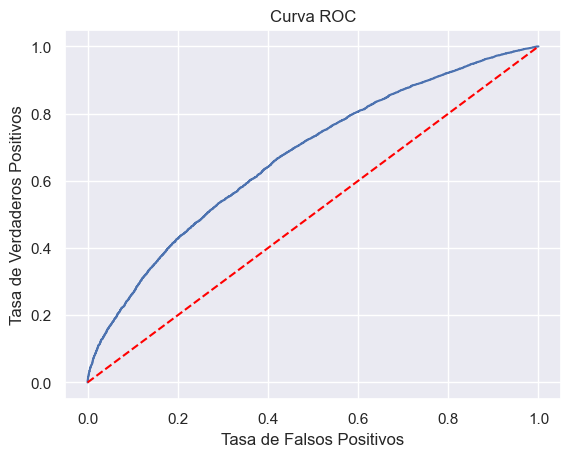

In [139]:
plt.plot(falsos_positivos, verdaderos_positivos) # Definimos los datos del gráfico, falsos x, verdaderos y
plt.plot(falsos_positivos, falsos_positivos, linestyle = '--', color = 'red') # Benchmark (Predictor 50/50)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')

In [140]:
# ¿Pero que tan bueno es nuestro modelo?
# Para eso nos sirve la métrica AUC (área bajo la curva)
# Por ejemplo, el AUC del predictor 50/50 es 50%
# Estimemos el AUC de nuestro modelo

In [141]:
AUC = roc_auc_score(df_prediccion['Real'], df_prediccion['Proba_Prediccion'])

In [142]:
AUC

0.6716506311143577

In [143]:
# ¿Es esto bueno o malo? Bueno, podríamos catalogarlo como regular.

# Implentando el modelo Random Forest

In [144]:
X_train_rf = independiente_entreno
y_train_rf = dependiente_entreno.values.ravel() # Asegurarse de que y sea un array 1D
X_test_rf = independiente_evaluacion
y_test_rf = dependiente_evaluacion.values.ravel()

In [145]:
# Definir el rango de hiperparámetros a buscar
# Estos son un buen punto de partida. Puedes expandirlos o reducirlos según el tiempo de cómputo y la necesidad.
# param_grid_rf = {
#    'n_estimators': [50, 75],
#    'max_features': ['sqrt', 'log2'],
#    'max_depth': [10, 20, 30, None],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'bootstrap': [True, False]
# }

# Primera Busqueda
# param_distributions_rf = {
#    'n_estimators': [50, 100], # Solo 50 y 100 árboles
#    'max_features': ['sqrt'], # Generalmente buen punto de partida, y solo una opción para reducir combinaciones
#    'max_depth': [10, 20, None], # Prueba estas profundidades, None puede ser intensivo
#    'min_samples_split': [2, 5],
#    'min_samples_leaf': [1, 2],
#    'bootstrap': [True] # Mantener True para ayudar con la memoria
#}

# considerando la anterior corrida se definiran los mejores parametros
param_distributions_rf = {
    'n_estimators': [100], # Solo 50 y 100 árboles
    'max_features': ['sqrt'], # Generalmente buen punto de partida, y solo una opción para reducir combinaciones
    'max_depth': [15], # Prueba estas profundidades, None puede ser intensivo, ya se probo con 10
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'bootstrap': [True] # Mantener True para ayudar con la memoria
}

In [146]:
# Inicializar el modelo Random Forest
# 'class_weight balanced' es crucial para manejar el desequilibrio de clases en tu dataset de incumplimiento
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')


In [147]:
# Configurar GridSearchCV para encontrar los mejores hiperparámetros
# 'cv=3' para 3-fold cross-validation. 'scoring=roc_auc' es ideal para datasets desequilibrados.
# 'n_jobs=-1' usa todos los núcleos de tu CPU.
# grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
#                              cv=3, n_jobs=-1, verbose=2, scoring='roc_auc')

# Configurar RandomizedSearchCV
# n_iter:  Número de combinaciones aleatorias a probar.
#         Empieza con un valor BAJO.
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions_rf,
                                      n_iter=50, # ¡Prueba solo 50 combinaciones aleatorias!
                                      cv=5, n_jobs=-1, verbose=2, scoring='roc_auc', random_state=42)

print(f"Iniciando ajuste de hiperparámetros para Random Forest. Se probarán {random_search_rf.n_iter} combinaciones.")
random_search_rf.fit(X_train_rf, y_train_rf)
print("Ajuste de hiperparámetros para Random Forest completado.")

Iniciando ajuste de hiperparámetros para Random Forest. Se probarán 50 combinaciones.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Ajuste de hiperparámetros para Random Forest completado.


In [148]:
#print("Iniciando ajuste de hiperparámetros para Random Forest...")
#grid_search_rf.fit(X_train_rf, y_train_rf)
#print("Ajuste de hiperparámetros para Random Forest completado.")

# Mostrar los mejores hiperparámetros encontrados
#print("\nMejores hiperparámetros para Random Forest:")
#print(grid_search_rf.best_params_)


# --- MENSAJES DE IMPRESIÓN ACTUALIZADOS ---
print(f"Iniciando ajuste de hiperparámetros para Random Forest con RandomizedSearchCV. Se probarán {random_search_rf.n_iter} combinaciones.")
random_search_rf.fit(X_train_rf, y_train_rf)
print("Ajuste de hiperparámetros para Random Forest con RandomizedSearchCV completado.")


# Mostrar los mejores hiperparámetros encontrados
print("\nMejores hiperparámetros para Random Forest (obtenidos con RandomizedSearchCV):")
print(random_search_rf.best_params_)

Iniciando ajuste de hiperparámetros para Random Forest con RandomizedSearchCV. Se probarán 50 combinaciones.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Ajuste de hiperparámetros para Random Forest con RandomizedSearchCV completado.

Mejores hiperparámetros para Random Forest (obtenidos con RandomizedSearchCV):
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': True}


### Resultado de la busqueda de la mejor convinacion de hiperparametros:

Iniciando ajuste de hiperparámetros para Random Forest con RandomizedSearchCV. Se probarán 20 combinaciones.
Fitting 3 folds for each of 50 candidates
Ajuste de hiperparámetros para Random Forest con RandomizedSearchCV completado.

Mejores hiperparámetros para Random Forest (obtenidos con RandomizedSearchCV):
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}

In [149]:
# Obtener el mejor modelo de Random Forest entrenado
best_rf_model = random_search_rf.best_estimator_

In [150]:
# Realizar predicciones y obtener probabilidades con el mejor modelo de Random Forest
probabilidad_y_rf = best_rf_model.predict_proba(X_test_rf)[:, 1] # Probabilidad de ser la clase positiva (incumplimiento=1)
prediccion_y_rf = best_rf_model.predict(X_test_rf) # Predicción binaria (0 o 1)

# Calculo de los valores de fpr_rf y tpr_rf!**
fpr_rf_curva, tpr_rf_curva, thresholds_rf_curva = roc_curve(y_test_rf, probabilidad_y_rf) # Usamos y_test_rf (valores reales) y las probabilidades

# Preparar DataFrame de predicciones para Random Forest para facilitar la evaluación
valores_reales_eval_rf = dependiente_evaluacion.copy().reset_index(drop = True)
df_prediccion_rf = pd.concat([valores_reales_eval_rf, pd.DataFrame(probabilidad_y_rf)], axis = 1)
df_prediccion_rf.columns = ['Real', 'Proba_Prediccion']
df_prediccion_rf.index = independiente_evaluacion.index

In [151]:
# Calcular Matriz de Confusión para Random Forest
punto_de_corte_rf = 0.5
df_prediccion_rf['Prediccion'] = np.where(df_prediccion_rf['Proba_Prediccion'] > punto_de_corte_rf, 1, 0)
matriz_confusion_rf = pd.crosstab(df_prediccion_rf['Real'], df_prediccion_rf['Prediccion'],
                                  rownames = ['Valores Reales'], colnames = ['Predicciones'])
print("\n--- Matriz de Confusión para Random Forest (punto de corte 0.5) ---")
print(matriz_confusion_rf)
print("\n--- Matriz de Confusión (%) para Random Forest (punto de corte 0.5) ---")
print(matriz_confusion_rf / df_prediccion_rf.shape[0])

print("\n--- Fin del bloque: Modelo Random Forest ---")



--- Matriz de Confusión para Random Forest (punto de corte 0.5) ---
Predicciones        0      1
Valores Reales              
0                2476   1906
1               12944  29303

--- Matriz de Confusión (%) para Random Forest (punto de corte 0.5) ---
Predicciones           0         1
Valores Reales                    
0               0.053100  0.040876
1               0.277595  0.628429

--- Fin del bloque: Modelo Random Forest ---


# Bloque 2: Medidas de Evaluación y Comparación de Modelos

In [152]:
print("\n--- Iniciando cálculo y comparación de métricas ---")

# --- Recálculo de métricas para Regresión Logística (Asegura que estén actualizadas si hubo cambios) ---
# Si ya las calculaste y las tienes en variables, puedes omitir esta re-declaración y usar tus variables existentes.
# Sin embargo, lo incluyo aquí para asegurar la coherencia si este bloque se ejecuta de forma independiente.
#probabilidad_y_rl = regresion2.predict_proba(independiente_evaluacion)[:,1]
#prediccion_y_rl = regresion2.predict(independiente_evaluacion)


--- Iniciando cálculo y comparación de métricas ---


In [155]:
# --- Métricas para Regresión Logística (aseguradas de estar disponibles de la Sección 3) ---
# auc_rl ya se calculó en la Sección 3
mse_rl = mean_squared_error(df_prediccion['Real'], df_prediccion['Prediccion'])
precision_rl = precision_score(df_prediccion['Real'], df_prediccion['Prediccion'])
recall_rl = recall_score(df_prediccion['Real'], df_prediccion['Prediccion'])
f1_rl = f1_score(df_prediccion['Real'], df_prediccion['Prediccion'])
logloss_rl = log_loss(df_prediccion['Real'], df_prediccion['Prediccion'])


In [156]:
# --- Métricas para Random Forest (aseguradas de estar disponibles de la Sección 4) ---
auc_rf = roc_auc_score(df_prediccion_rf['Real'], df_prediccion_rf['Proba_Prediccion'])
mse_rf = mean_squared_error(df_prediccion_rf['Real'], df_prediccion_rf['Proba_Prediccion'])
precision_rf = precision_score(df_prediccion_rf['Real'], df_prediccion_rf['Prediccion'])
recall_rf = recall_score(df_prediccion_rf['Real'], df_prediccion_rf['Prediccion'])
f1_rf = f1_score(df_prediccion_rf['Real'], df_prediccion_rf['Prediccion'])
logloss_rf = log_loss(df_prediccion_rf['Real'], df_prediccion_rf['Proba_Prediccion'])


In [158]:
# Nombres de variables específicos para Regresión Logística
fpr_rl_curva, tpr_rl_curva, thresholds_rl_curva = roc_curve(df_prediccion['Real'], df_prediccion['Proba_Prediccion'])
auc_rl = roc_auc_score(df_prediccion['Real'], df_prediccion['Proba_Prediccion'])


In [159]:
# Crear un DataFrame para comparar las métricas de ambos modelos
comparacion_metricas = pd.DataFrame({
    'Métrica': [
        'AUC-ROC',
        'Error Cuadrático Medio (MSE)',
        'Precisión (Precision)',
        'Recall (Sensibilidad)',
        'F1-Score',
        'Log Loss' 
    ],
    'Regresión Logística': [
        auc_rl,
        mse_rl,
        precision_rl,
        recall_rl,
        f1_rl,
        logloss_rl
    ],
    'Random Forest (Optimizado)': [
        auc_rf,
        mse_rf,
        precision_rf,
        recall_rf,
        f1_rf,
        logloss_rf
    ]
})

In [160]:
print("\n--- Tabla Comparativa de Métricas de Modelos ---")
print(comparacion_metricas.set_index('Métrica').round(4)) # Redondeamos para mejor visualización



--- Tabla Comparativa de Métricas de Modelos ---
                              Regresión Logística  Random Forest (Optimizado)
Métrica                                                                      
AUC-ROC                                    0.6717                      0.6804
Error Cuadrático Medio (MSE)               0.3856                      0.2066
Precisión (Precision)                      0.9403                      0.9389
Recall (Sensibilidad)                      0.6134                      0.6936
F1-Score                                   0.7425                      0.7978
Log Loss                                  13.8968                      0.6009


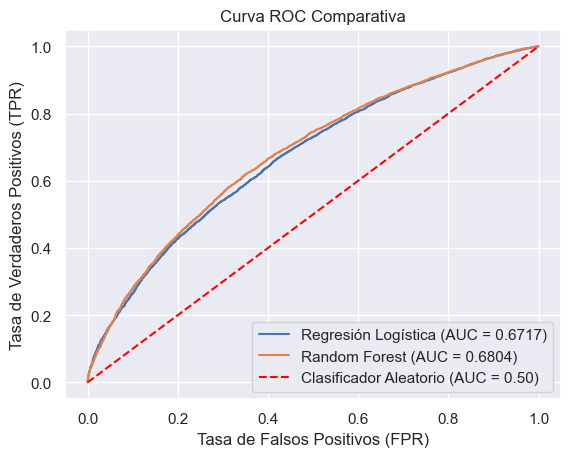

In [161]:
# --- Visualización de Curvas ROC ---
plt.plot(fpr_rl_curva, tpr_rl_curva, label=f'Regresión Logística (AUC = {auc_rl:.4f})')
plt.plot(fpr_rf_curva, tpr_rf_curva, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Clasificador Aleatorio (AUC = 0.50)')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Comparativa')
plt.legend()
plt.grid(True)
plt.show()

In [162]:
# --- Cálculo y Visualización de Coeficiente de Gini para Random Forest ---
# Ordenar el DataFrame de predicciones de RF para calcular Gini y KS
df_prediccion_rf_sorted = df_prediccion_rf.sort_values('Proba_Prediccion').reset_index(drop=True)
df_prediccion_rf_sorted['Número Acumulado de Clientes'] = df_prediccion_rf_sorted.index + 1
df_prediccion_rf_sorted['Número Acumulado de Clientes Buenos'] = df_prediccion_rf_sorted['Real'].cumsum()
df_prediccion_rf_sorted['Número Acumulado de Clientes Malos'] = df_prediccion_rf_sorted['Número Acumulado de Clientes'] - df_prediccion_rf_sorted['Número Acumulado de Clientes Buenos']
df_prediccion_rf_sorted['% Acumulado Clientes'] = df_prediccion_rf_sorted['Número Acumulado de Clientes'] / df_prediccion_rf_sorted.shape[0]
df_prediccion_rf_sorted['% Acumulado Clientes Buenos'] = df_prediccion_rf_sorted['Número Acumulado de Clientes Buenos'] / df_prediccion_rf_sorted['Real'].sum()
df_prediccion_rf_sorted['% Acumulado Clientes Malos'] = df_prediccion_rf_sorted['Número Acumulado de Clientes Malos'] / (df_prediccion_rf_sorted.shape[0] - df_prediccion_rf_sorted['Real'].sum())


In [163]:
gini_rf = auc_rf * 2 - 1
print(f"\nCoeficiente de Gini para Random Forest: {gini_rf:.4f}")


Coeficiente de Gini para Random Forest: 0.3608


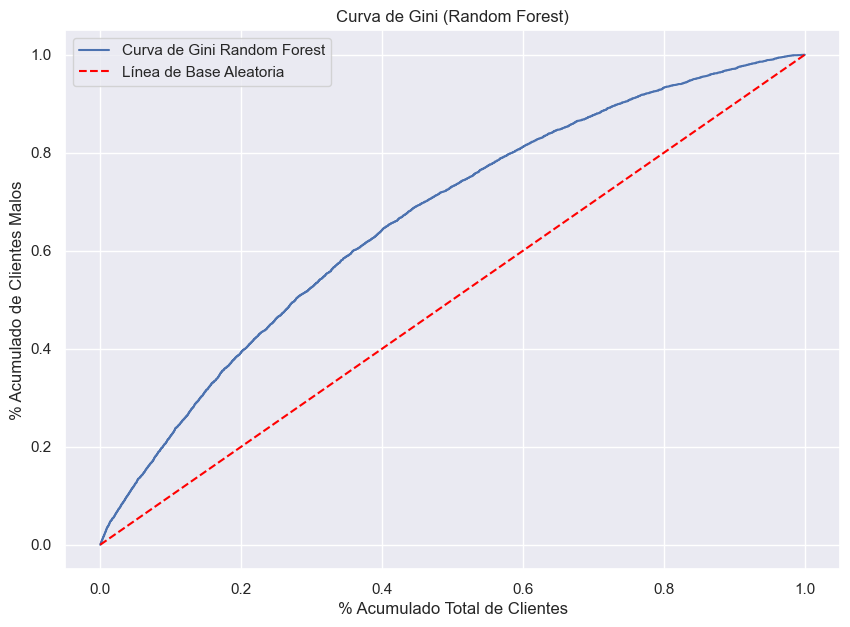

In [164]:

plt.figure(figsize=(10, 7))
plt.plot(df_prediccion_rf_sorted['% Acumulado Clientes'], df_prediccion_rf_sorted['% Acumulado Clientes Malos'], label='Curva de Gini Random Forest')
plt.plot(df_prediccion_rf_sorted['% Acumulado Clientes'], df_prediccion_rf_sorted['% Acumulado Clientes'], linestyle = '--', color = 'red', label='Línea de Base Aleatoria')
plt.xlabel('% Acumulado Total de Clientes')
plt.ylabel('% Acumulado de Clientes Malos')
plt.title('Curva de Gini (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

# --- Fin del bloque: Medidas de Evaluación y Comparación ---

In [193]:
df_prediccion_rf_sorted = df_prediccion_rf.sort_values(by='Proba_Prediccion', ascending=True).reset_index(drop=True)

# 2. Calcular los totales de clientes "Buenos" y "Malos"
total_malos = (df_prediccion_rf_sorted['Real'] == 0).sum() # Clientes con Real = 0 (Malos)
total_buenos = (df_prediccion_rf_sorted['Real'] == 1).sum() # Clientes con Real = 1 (Buenos)

# 3. Calcular las proporciones acumuladas
# Acumulado de "Malos" (Real=0): Usamos (df_prediccion_rf_sorted['Real'] == 0).cumsum()
df_prediccion_rf_sorted['Acumulado_Malos'] = (df_prediccion_rf_sorted['Real'] == 0).cumsum()
df_prediccion_rf_sorted['% Acumulado Malos'] = df_prediccion_rf_sorted['Acumulado_Malos'] / total_malos

# Acumulado de "Buenos" (Real=1): Usamos (df_prediccion_rf_sorted['Real'] == 1).cumsum()
df_prediccion_rf_sorted['Acumulado_Buenos'] = (df_prediccion_rf_sorted['Real'] == 1).cumsum()
df_prediccion_rf_sorted['% Acumulado Buenos'] = df_prediccion_rf_sorted['Acumulado_Buenos'] / total_buenos




Coeficiente de Kolmogorov-Smirnov (KS) para Random Forest: 0.2692


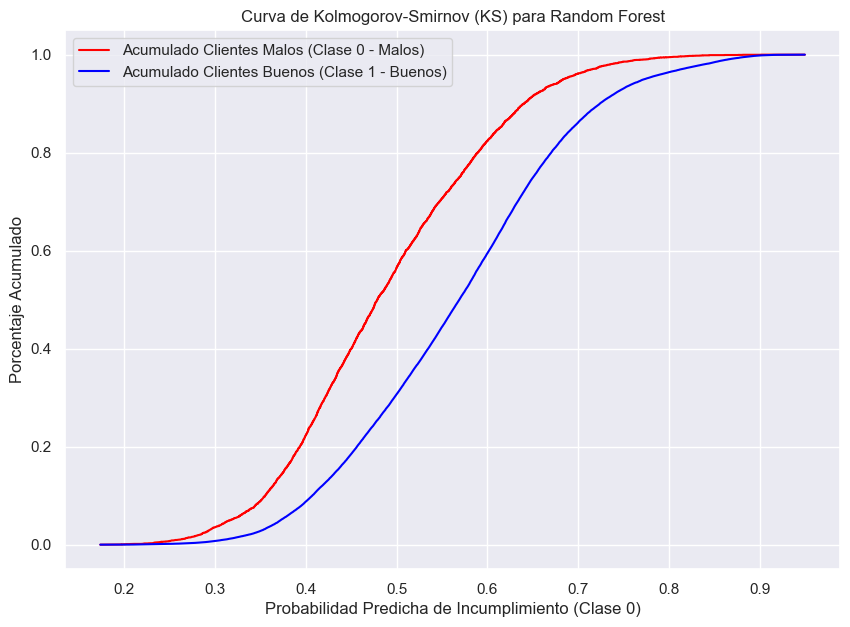

La máxima diferencia KS se encuentra en la probabilidad: 0.5290
En ese punto, % Acumulado Malos: 0.6536
En ese punto, % Acumulado Buenos: 0.3843
La máxima diferencia KS se encuentra en la probabilidad: 0.5290


In [194]:
# 4. Calcular KS
# El KS es la máxima diferencia entre % Acumulado Malos y % Acumulado Buenos.
# Como ordenamos por Proba_Prediccion (probabilidad de ser MALO) de menor a mayor,
# esperamos que la curva de BUENOS (Real=1) suba más rápido al principio (menores prob. de ser Malo),
# y la curva de MALOS (Real=0) suba más rápido después (mayores prob. de ser Malo).
# La máxima diferencia se buscará donde la curva de MALOS (roja) se distancia de la de BUENOS (azul).
ks_score = np.max(df_prediccion_rf_sorted['% Acumulado Malos'] - df_prediccion_rf_sorted['% Acumulado Buenos'])

print(f"\nCoeficiente de Kolmogorov-Smirnov (KS) para Random Forest: {ks_score:.4f}")

# 5. Visualización de la curva KS
plt.figure(figsize=(10, 7))

# Graficar la probabilidad acumulada de malos (Clase 0)
# La curva de "malos" es la que debe "escapar" más rápido de la diagonal en un buen modelo
plt.plot(df_prediccion_rf_sorted['Proba_Prediccion'], df_prediccion_rf_sorted['% Acumulado Malos'],
         label='Acumulado Clientes Malos (Clase 0 - Malos)', color='red')

# Graficar la probabilidad acumulada de buenos (Clase 1)
plt.plot(df_prediccion_rf_sorted['Proba_Prediccion'], df_prediccion_rf_sorted['% Acumulado Buenos'],
         label='Acumulado Clientes Buenos (Clase 1 - Buenos)', color='blue')


plt.title('Curva de Kolmogorov-Smirnov (KS) para Random Forest')
plt.xlabel('Probabilidad Predicha de Incumplimiento (Clase 0)') # Ajustar el label del eje X
plt.ylabel('Porcentaje Acumulado')
plt.legend()
plt.grid(True)
plt.show()

# Opcional: Para encontrar el punto exacto de KS
idx_ks = np.argmax(df_prediccion_rf_sorted['% Acumulado Malos'] - df_prediccion_rf_sorted['% Acumulado Buenos'])
ks_proba_threshold = df_prediccion_rf_sorted['Proba_Prediccion'].iloc[idx_ks]
print(f"La máxima diferencia KS se encuentra en la probabilidad: {ks_proba_threshold:.4f}")
print(f"En ese punto, % Acumulado Malos: {df_prediccion_rf_sorted['% Acumulado Malos'].iloc[idx_ks]:.4f}")
print(f"En ese punto, % Acumulado Buenos: {df_prediccion_rf_sorted['% Acumulado Buenos'].iloc[idx_ks]:.4f}")
print(f"La máxima diferencia KS se encuentra en la probabilidad: {ks_proba_threshold:.4f}")

# Coeficientes de Gini y Kolgomorov-Smirnov Regresion Logistica

In [ ]:
# Ordenemos el df por las probabilidades en orden ascendente

In [165]:
df_prediccion = df_prediccion.sort_values('Proba_Prediccion')

In [166]:
df_prediccion.head()

,Real,Proba_Prediccion,Prediccion,Monto
14867,0,0.091396,0,11400
42433,1,0.091822,0,3000
9359,0,0.095865,0,22750
220386,0,0.096412,0,13800
208784,0,0.101421,0,31825


In [ ]:
df_prediccion.tail()

In [167]:
# Para calcular la proporción acumulativa, tenemos que reindexar el df con el orden
# ascendente de probababilidad que tenemos. Queremos que la observación con la menor
# probabilidad tenga un índice de 0, la siguiente uno y así sucesivamente
# Utilizamos en método .reset_index()

In [168]:
df_prediccion = df_prediccion.reset_index()

In [169]:
df_prediccion.head()

,index,Real,Proba_Prediccion,Prediccion,Monto
0,14867,0,0.091396,0,11400
1,42433,1,0.091822,0,3000
2,9359,0,0.095865,0,22750
3,220386,0,0.096412,0,13800
4,208784,0,0.101421,0,31825


In [ ]:
# Notemos que como sobreescribimos el índice sin utilizar drop = True, se generó automáticamente
# una columna index que preserva los índices originales. Podemos utilizar estos últimos para 
# saber quien es cada cliente.

In [ ]:
# Para hacer los gráficos del desempeño de nuestro modelo necesitamos:
# 1. El porcentaje acumulado del total de clientes
# 2. El porcentaje acumulado de los clientes buenos
# 3. El porcentaje acumulado de los clientes malos
# Antes de estimar el porcentaje, calculemos en número (n) de ellos

In [ ]:
# Acumulado del total de clientes: suma de los índices

In [170]:
df_prediccion['Número Acumulado de Clientes'] = df_prediccion.index + 1

In [ ]:
# Acumulado del total de clientes buenos: como 'Real' de buenos-malos es una variable binaria
# que toma el valor de 1 cuando el cliente es bueno, lo único que tenemos que hacer es hacer
# la suma acumulada de dicha variable utilizando el método .cumsum

In [171]:
df_prediccion['Número Acumulado de Clientes Buenos'] = df_prediccion['Real'].cumsum()

In [ ]:
# Acumulado del total de clientes malos: No podemos sumar los ceros acumulados (siempre sería cero).
# Pero para cada fila conocemos el número total de clientes acumulado y el total de clientes buenos
# acumulados. El acumulado de clientes malos debería ser la diferencia entre estos dos números

In [172]:
df_prediccion['Número Acumulado de Clientes Malos'] = df_prediccion['Número Acumulado de Clientes'] - df_prediccion['Número Acumulado de Clientes Buenos']

In [173]:
df_prediccion.head()

,index,Real,Proba_Prediccion,Prediccion,Monto,Número Acumulado de Clientes,Número Acumulado de Clientes Buenos,Número Acumulado de Clientes Malos
0,14867,0,0.091396,0,11400,1,0,1
1,42433,1,0.091822,0,3000,2,1,1
2,9359,0,0.095865,0,22750,3,1,2
3,220386,0,0.096412,0,13800,4,1,3
4,208784,0,0.101421,0,31825,5,1,4


In [174]:
df_prediccion.tail()

,index,Real,Proba_Prediccion,Prediccion,Monto,Número Acumulado de Clientes,Número Acumulado de Clientes Buenos,Número Acumulado de Clientes Malos
46624,260009,1,0.932624,1,25000,46625,42243,4382
46625,275169,1,0.933550,1,28000,46626,42244,4382
46626,263634,1,0.933979,1,5000,46627,42245,4382
46627,255463,1,0.934586,1,20000,46628,42246,4382
46628,232642,1,0.937646,1,28000,46629,42247,4382


In [ ]:
# Una ves hemos estimado en número acumulado, debemos estimar la proporción acumulada
# Para el % Acumulado de Clientes dividimos el Número Acumulado de Clientes / Total de Clientes

In [175]:
df_prediccion['% Acumulado Clientes'] = df_prediccion['Número Acumulado de Clientes'] / df_prediccion.shape[0]

In [176]:
# Para los el % Acumulado de Clientes Buenos dividimos el Número Acumulado de Clientes Buenos / Total de Clientes Buenos

In [177]:
df_prediccion['% Acumulado Clientes Buenos'] = df_prediccion['Número Acumulado de Clientes Buenos'] / df_prediccion['Real'].sum()

In [ ]:
# Para los el % Acumulado de Clientes Buenos dividimos el Número Acumulado de Clientes Malos / Total de Clientes Malos

In [178]:
df_prediccion['% Acumulado Clientes Malos'] = df_prediccion['Número Acumulado de Clientes Malos'] / (df_prediccion.shape[0] - df_prediccion['Real'].sum())

In [179]:
df_prediccion.head()

,index,Real,Proba_Prediccion,Prediccion,Monto,Número Acumulado de Clientes,Número Acumulado de Clientes Buenos,Número Acumulado de Clientes Malos,% Acumulado Clientes,% Acumulado Clientes Buenos,% Acumulado Clientes Malos
0,14867,0,0.091396,0,11400,1,0,1,0.000021,0.000000,0.000228
1,42433,1,0.091822,0,3000,2,1,1,0.000043,0.000024,0.000228
2,9359,0,0.095865,0,22750,3,1,2,0.000064,0.000024,0.000456
3,220386,0,0.096412,0,13800,4,1,3,0.000086,0.000024,0.000685
4,208784,0,0.101421,0,31825,5,1,4,0.000107,0.000024,0.000913


In [ ]:
# Coeficientes de Gini y Kolgomorov-Smirnov.

In [ ]:
#  calculamos los % acumulados, que es todo lo que necesitamos para hacer los
# gráficos y estimar los coeficientes de Gini y K-S
# Comencemos con el gráfico de Gini que es el % Acumulado de Malos (eje Y) como función del % Acumulado del total (eje X)

Text(0.5, 1.0, 'Curva de Gini')

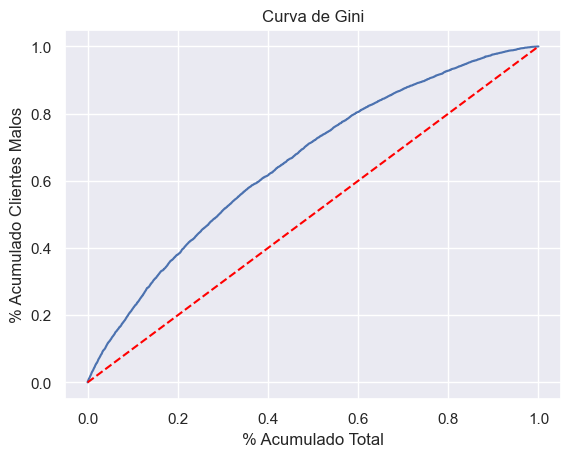

In [180]:
plt.plot(df_prediccion['% Acumulado Clientes'], df_prediccion['% Acumulado Clientes Malos'])
plt.plot(df_prediccion['% Acumulado Clientes'], df_prediccion['% Acumulado Clientes'], linestyle = '--', color = 'red') # Benchmark de predicción aleatoria 50-50
plt.xlabel('% Acumulado Total')
plt.ylabel('% Acumulado Clientes Malos')
plt.title('Curva de Gini')

In [ ]:
# Seguramente han notado las similitudes entre el gráfico de GINI y el AUC
# De hecho, el coeficiente de Gini puede ser expresado como
# GINI = AUC*2-1

In [181]:
Coef_Gini = AUC*2-1
Coef_Gini

0.3433012622287155

In [ ]:
# Un valor de Gini de 0 indicaría que los consumidores morosos se distribuyen equitativamente en 
# todo el rango de scoring; en otras palabras, que el puntaje crediticio no asignó puntajes 
# crediticios más bajos a más consumidores que incumplieron, como un indicador con más poder  
# predictivo haría. Un valor de coeficiente de 100% indicaría que a todos los consumidores 
# morosos se les asignaron con éxito las puntuaciones más bajas posibles. 

In [ ]:
# Ahora hagamos el gráfico K-S
# Recordemos, el estadístico K-S mide la distancia (sobre el eje Y) de dos funciones de distribución
# acumulativas. A mayor distancia, mejor es la característia que los distingue. En nuestro caso específico
# las funciones son:
# % Acumulado de Buenos Clientes como función de la Probabilidad de ser bueno (Proba_Prediccion)
# % Acumulado de Malos Clientes como función de la Probabilidad de ser bueno
# Si el modelo fuera perfecto: Distancia máxima = 1
# Un modelo de predicción aleatorio: Distancia tendiendo a cero
# Hagamos el gráfico

Text(0.5, 1.0, 'Kolgomorov-Smirnov Regresion Logistica')

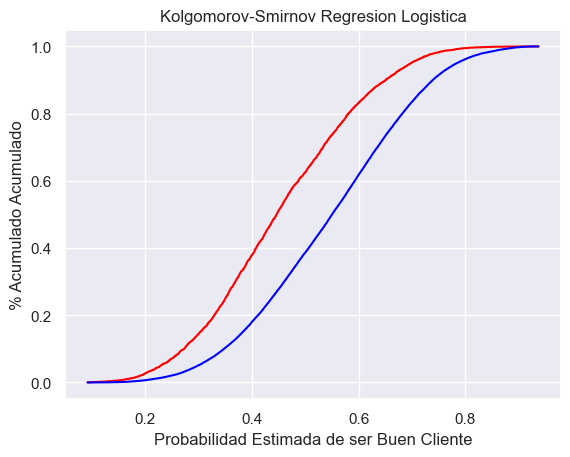

In [187]:
plt.plot(df_prediccion['Proba_Prediccion'], df_prediccion['% Acumulado Clientes Malos'], color = 'red')
plt.plot(df_prediccion['Proba_Prediccion'], df_prediccion['% Acumulado Clientes Buenos'], color = 'blue')
plt.xlabel('Probabilidad Estimada de ser Buen Cliente')
plt.ylabel('% Acumulado Acumulado')
plt.title('Kolgomorov-Smirnov Regresion Logistica')

In [ ]:
# El coeficiente K-S es la distancia (vertical) máxima entre la curva roja y la curva azul
# La podemos calcular con los datos del df: el máximo de la diferencia entre el % acumulado de los malos
# menos el % acumulado de los buenos:

In [183]:
Coef_KS = max(df_prediccion['% Acumulado Clientes Malos']-df_prediccion['% Acumulado Clientes Buenos'])

In [184]:
Coef_KS

0.24595500325145497

In [ ]:
# No se acerca a 1 pero es significativamente mayor que cero.
# Las dos distribuciones acumulativas están lo suficientemente distantes. Podemos afirmar que el
# modelo tienen un poder de predicción satisfactorio